In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Activation, Dense, Flatten, Conv2D, MaxPool2D, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD, Adam
import matplotlib.pyplot as plt
import seaborn as sns

2024-04-21 17:22:15.077736: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-21 17:22:15.333046: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-21 17:22:15.370000: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/usr/local/cuda/lib64:/usr/local/cuda/extras/CUPTI/lib64
2024-04-21 17:22:15.37001

In [2]:
X_train = np.load('X_train.npy')
Y_train = np.load('Y_train.npy')
X_test = np.load('X_test.npy')
Y_test = np.load('Y_test.npy')

In [3]:
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]


In [4]:
input_shape = X_train.shape[1:]
input_shape

(862, 13, 1)

In [5]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation = "relu", input_shape = input_shape))
model.add(MaxPool2D((3, 3), strides=(2, 2), padding="same"))
model.add(BatchNormalization())

model.add(Conv2D(32, (3, 3), activation = "relu"))
model.add(MaxPool2D((3, 3), strides=(2, 2), padding="same"))
model.add(BatchNormalization())

model.add(Conv2D(32, (2, 2), activation = "relu"))
model.add(MaxPool2D((2, 2), strides=(2, 2), padding="same"))
model.add(BatchNormalization())

model.add(Conv2D(16, (1, 1), activation = "relu"))
model.add(MaxPool2D((1, 1), strides=(2, 2), padding="same"))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(10, activation="softmax"))

model.summary()

2024-04-21 17:22:18.248831: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-21 17:22:18.249022: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/usr/local/cuda/lib64:/usr/local/cuda/extras/CUPTI/lib64
2024-04-21 17:22:18.249103: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/usr/local/cuda/lib64:/usr/local/cuda/extras/CUPTI/lib64
2024-04-21 17:22:18.249148: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 860, 11, 64)       640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 430, 6, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 430, 6, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 428, 4, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 214, 2, 32)       0         
 2D)                                                             
                                                        

In [6]:
model.compile(loss="sparse_categorical_crossentropy", optimizer= Adam(learning_rate=1e-4), metrics=['accuracy'])

In [7]:
es = EarlyStopping(patience=10, restore_best_weights=True, monitor="val_loss")

In [8]:
hist = model.fit(X_train, Y_train,
                 validation_data = (X_test,Y_test),
                 epochs = 100,
                 batch_size = 32,
                 callbacks = [es]
                 )

Epoch 1/100
313/313 [==============================] - 23s 69ms/step - loss: 2.0897 - accuracy: 0.3108 - val_loss: 1.4937 - val_accuracy: 0.4430
Epoch 2/100
313/313 [==============================] - 21s 66ms/step - loss: 1.4967 - accuracy: 0.4736 - val_loss: 1.1792 - val_accuracy: 0.5735
Epoch 3/100
313/313 [==============================] - 20s 65ms/step - loss: 1.2824 - accuracy: 0.5440 - val_loss: 1.0279 - val_accuracy: 0.6380
Epoch 4/100
313/313 [==============================] - 20s 65ms/step - loss: 1.1435 - accuracy: 0.5861 - val_loss: 0.9065 - val_accuracy: 0.6815
Epoch 5/100
313/313 [==============================] - 20s 65ms/step - loss: 1.0245 - accuracy: 0.6333 - val_loss: 0.8569 - val_accuracy: 0.7080
Epoch 6/100
313/313 [==============================] - 20s 65ms/step - loss: 0.9189 - accuracy: 0.6754 - val_loss: 0.7251 - val_accuracy: 0.7435
Epoch 7/100
313/313 [==============================] - 21s 67ms/step - loss: 0.8121 - accuracy: 0.7110 - val_loss: 0.6439 - val_ac

In [9]:
def plot_history(hist):
    plt.figure(figsize=(20,15))
    fig, axs = plt.subplots(2)
    # accuracy subplot
    axs[0].plot(hist.history["accuracy"], label="train accuracy")
    axs[0].plot(hist.history["val_accuracy"], label="test accuracy")    
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")
    
    # Error subplot
    axs[1].plot(hist.history["loss"], label="train error")
    axs[1].plot(hist.history["val_loss"], label="test error")    
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")
    
    plt.show()

<Figure size 2000x1500 with 0 Axes>

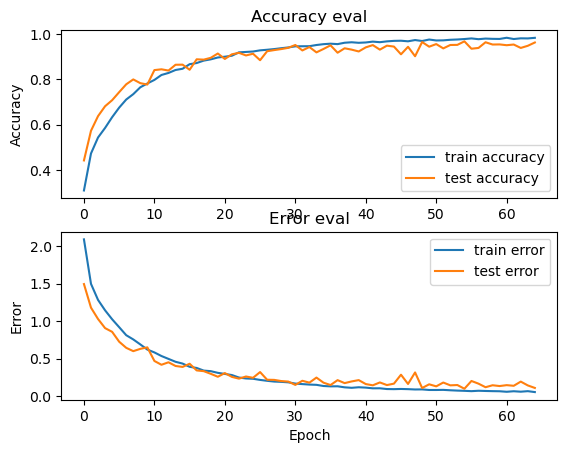

In [10]:
plot_history(hist)

In [11]:
test_error, test_accuracy = model.evaluate(X_test, Y_test, verbose=1)
print(f"Test accuracy: {test_accuracy}")

63/63 [==============================] - 1s 20ms/step - loss: 0.0983 - accuracy: 0.9670
Test accuracy: 0.9670000076293945
